### Load DataSet

In [1]:
from tensorflow import keras
import tensorflow  as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

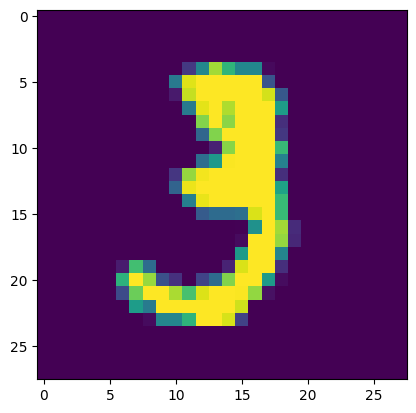

In [5]:
plt.imshow(x_train[10])
plt.show()

### Pre-processing

In [6]:
x_train = x_train.reshape((-1, 28,28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28,28, 1)).astype('float32') / 255

In [7]:
x_train.shape

(60000, 28, 28, 1)

### Model Definition

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size= (2,2), input_shape  =(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Conv2D(filters = 32, kernel_size= (2,2), input_shape  =(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10,activation = 'sigmoid'  ))

In [11]:
model.compile(loss = tf.losses.sparse_categorical_crossentropy,  optimizer = tf.optimizers.Adam(), metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 batch_normalization_2 (Bat  (None, 27, 27, 32)        128       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 27, 27, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        4128      
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)       

In [13]:
hist =model.fit(x_train, y_train, epochs= 10, batch_size = 256,  validation_data = (x_test,  y_test))

Epoch 1/10
235/235 [==============================] - 95s 399ms/step - loss: 0.2830 - accuracy: 0.9182 - val_loss: 2.0898 - val_accuracy: 0.2767
Epoch 2/10
235/235 [==============================] - 89s 380ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.1914 - val_accuracy: 0.9483
Epoch 3/10
235/235 [==============================] - 90s 382ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0788 - val_accuracy: 0.9760
Epoch 4/10
235/235 [==============================] - 90s 383ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 5/10
235/235 [==============================] - 92s 392ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0713 - val_accuracy: 0.9771
Epoch 6/10
235/235 [==============================] - 90s 385ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.1609 - val_accuracy: 0.9564
Epoch 7/10
235/235 [==============================] - 91s 388ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0868 - val_ac

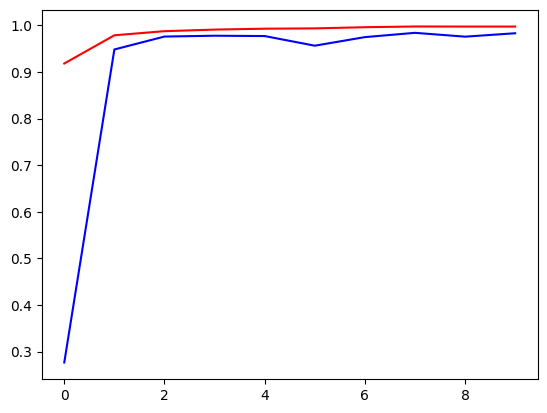

In [14]:
plt.plot(hist.history['accuracy'], color = 'r')
plt.plot(hist.history['val_accuracy'], color = 'b')